# 5_金融数据获取、清洗、整理和存储

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

## 1. 从不同数据来源获取——本地

### 1.1 常用：本地文件读取

In [2]:
with open('Data/MSFT.csv', 'r') as f:      #推荐这种方法；
    for i in range(5):
        print(f.readline())

Date,Open,High,Low,Close,Adj Close,Volume

2020/10/28,207.669998,208.839996,202.100006,202.679993,200.837097,51195600

2020/10/29,204.070007,207.360001,203.369995,204.720001,202.858566,31432600

2020/10/30,203.5,204.289993,199.619995,202.470001,200.629028,36953700

2020/11/2,204.289993,205.279999,200.119995,202.330002,200.490295,30842200



In [3]:
f = open('data/MSFT.csv', 'r')
for i in range(5):
    print(f.readline())
f.close()

Date,Open,High,Low,Close,Adj Close,Volume

2020/10/28,207.669998,208.839996,202.100006,202.679993,200.837097,51195600

2020/10/29,204.070007,207.360001,203.369995,204.720001,202.858566,31432600

2020/10/30,203.5,204.289993,199.619995,202.470001,200.629028,36953700

2020/11/2,204.289993,205.279999,200.119995,202.330002,200.490295,30842200



In [4]:
with open('data/MSFT.csv', 'r') as f:            #未打印，不然会输出大量无用信息；
    print(f.read())

Date,Open,High,Low,Close,Adj Close,Volume
2020/10/28,207.669998,208.839996,202.100006,202.679993,200.837097,51195600
2020/10/29,204.070007,207.360001,203.369995,204.720001,202.858566,31432600
2020/10/30,203.5,204.289993,199.619995,202.470001,200.629028,36953700
2020/11/2,204.289993,205.279999,200.119995,202.330002,200.490295,30842200
2020/11/3,203.889999,208.119995,203.119995,206.429993,204.553009,27512000
2020/11/4,214.020004,218.320007,212.419998,216.389999,214.42247,42311800
2020/11/5,222.039993,224.119995,221.149994,223.289993,221.259705,36080100
2020/11/6,222.259995,224.360001,218.029999,223.720001,221.685806,25231900
2020/11/9,224.440002,228.119995,217.880005,218.389999,216.404266,44395000
2020/11/10,214.5,216.5,209.720001,211.009995,209.09137,44045100
2020/11/11,212.389999,218.039993,212.199997,216.550003,214.580994,29440800
2020/11/12,217.210007,219.110001,214.460007,215.440002,213.481094,21593900
2020/11/13,216.360001,217.419998,214.160004,216.509995,214.541351,18621100
2020/1

### 1.2 Python CSV模块读取

In [5]:
import csv

In [6]:
csv_reader = csv.reader(open('data/MSFT.csv', 'r'))

In [7]:
csv_reader

In [8]:
data = [i for i in csv_reader]               #从csv_reader中读取出数据，将其解析成list；

In [9]:
type(data)

list

In [10]:
data[:5]

[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
 ['2020/10/28',
  '207.669998',
  '208.839996',
  '202.100006',
  '202.679993',
  '200.837097',
  '51195600'],
 ['2020/10/29',
  '204.070007',
  '207.360001',
  '203.369995',
  '204.720001',
  '202.858566',
  '31432600'],
 ['2020/10/30',
  '203.5',
  '204.289993',
  '199.619995',
  '202.470001',
  '200.629028',
  '36953700'],
 ['2020/11/2',
  '204.289993',
  '205.279999',
  '200.119995',
  '202.330002',
  '200.490295',
  '30842200']]

### 1.3 常用：Pandas读取CSV

In [13]:
import pandas as pd
import numpy as np

In [25]:
data = pd.read_csv('Data/MSFT.csv')

In [42]:
data = pd.read_csv('data/MSFT.csv', index_col=0,
                   parse_dates=True)                #解析日期

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-28 to 2021-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [44]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-28,207.669998,208.839996,202.100006,202.679993,200.837097,51195600
2020-10-29,204.070007,207.360001,203.369995,204.720001,202.858566,31432600
2020-10-30,203.500000,204.289993,199.619995,202.470001,200.629028,36953700
2020-11-02,204.289993,205.279999,200.119995,202.330002,200.490295,30842200
2020-11-03,203.889999,208.119995,203.119995,206.429993,204.553009,27512000


In [45]:
del data['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [46]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-28,207.669998,208.839996,202.100006,202.679993,200.837097,51195600
2020-10-29,204.070007,207.360001,203.369995,204.720001,202.858566,31432600
2020-10-30,203.500000,204.289993,199.619995,202.470001,200.629028,36953700
2020-11-02,204.289993,205.279999,200.119995,202.330002,200.490295,30842200
2020-11-03,203.889999,208.119995,203.119995,206.429993,204.553009,27512000


In [47]:
data.to_csv('Data\MSFT2.csv')

In [49]:
data.to_excel('Data\MSFT2.xlsx')

In [50]:
data.to_json('Data\MSFT2.json')

## 2. 从网络Open Source读取

### 2.1 Yahoo

安装yahoo数据接口，yfinace：

In [52]:
!pip install yfinance     #没有conda源

In [53]:
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [54]:
#不翻墙或者网速较慢可能无法从Yahoo读取，属于正常现象；
data = web.get_data_yahoo('GS', start = '2010-01-01', end = '2012-01-01')           

[*********************100%***********************]  1 of 1 completed


In [55]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,167.289993,170.130005,166.929993,168.839996,141.783157,6401800
2010-01-04,170.050003,174.250000,169.509995,173.080002,145.343750,9135000
2010-01-05,173.000000,176.259995,172.570007,176.139999,147.913361,11659400
2010-01-06,175.380005,175.380005,173.759995,174.259995,146.334610,7381100
2010-01-07,174.320007,178.750000,173.949997,177.669998,149.198212,8727400


In [56]:
data.round(2).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-23,94.80,95.00,92.73,93.79,80.43,3919500
2011-12-27,93.50,93.84,91.83,91.90,78.81,3672000
2011-12-28,91.66,92.44,90.04,90.12,77.29,3917400
2011-12-29,90.59,91.43,90.25,91.01,78.05,4290500
2011-12-30,90.53,91.14,90.14,90.43,77.55,4182800


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2009-12-31 to 2011-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [58]:
data= web.get_data_yahoo('MSFT', start = '2016-01-01', end = '2017-06-30')

[*********************100%***********************]  1 of 1 completed


In [59]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,56.040001,56.189999,55.419998,55.480000,50.298275,27334100
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.681789,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.908436,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,49.001827,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,47.297421,56564900


In [60]:
data.round(2).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-23,70.09,71.25,69.92,71.21,67.12,27617300
2017-06-26,71.40,71.71,70.44,70.53,66.47,19607000
2017-06-27,70.11,70.18,69.18,69.21,65.23,25215100
2017-06-28,69.21,69.84,68.79,69.80,65.79,25806200
2017-06-29,69.38,69.49,68.09,68.49,64.55,28918700


In [61]:
data= web.get_data_yahoo('600030.ss', start = '2016-01-01', end = '2017-07-01')    

[*********************100%***********************]  1 of 1 completed


In [62]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,19.290001,19.290001,17.420000,17.450001,15.445289,196058373
2016-01-05,16.799999,17.980000,16.629999,17.650000,15.622311,233329155
2016-01-06,17.549999,18.150000,17.200001,17.930000,15.870146,197278338
2016-01-07,17.480000,17.600000,16.200001,16.340000,14.462808,67903733
2016-01-08,16.840000,17.440001,16.000000,16.830000,14.896514,297925328


In [63]:
data = web.get_data_yahoo(['GS','MSFT'], start = '2016-01-01', end = '2017-07-01') 

[*********************100%***********************]  2 of 2 completed


In [64]:
data.describe

<bound method NDFrame.describe of              Adj Close                  Close                   High  \
                    GS       MSFT          GS       MSFT          GS   
Date                                                                   
2015-12-31  163.410614  50.298279  180.229996  55.480000  182.889999   
2016-01-04  160.608994  49.681782  177.139999  54.799999  177.190002   
2016-01-05  157.843597  49.908428  174.089996  55.049999  177.500000   
2016-01-06  153.990250  49.001827  169.839996  54.049999  172.020004   
2016-01-07  149.257370  47.297424  164.619995  52.169998  169.500000   
...                ...        ...         ...        ...         ...   
2017-06-26  204.190475  66.474350  220.440002  70.529999  221.970001   
2017-06-27  204.042236  65.230270  220.279999  69.209999  222.410004   
2017-06-28  206.765533  65.786354  223.220001  69.800003  224.630005   
2017-06-29  207.867783  64.551666  224.410004  68.489998  228.789993   
2017-06-30  205.542847  64.966

In [65]:
data.minor_xs('MSFT').head()

AttributeError: 'DataFrame' object has no attribute 'minor_xs'

In [66]:
data.minor_xs('GS').head()

AttributeError: 'DataFrame' object has no attribute 'minor_xs'

### 2.2 Quandl

In [67]:
import quandl

ModuleNotFoundError: No module named 'quandl'

In [ ]:
quandl.    #tab

In [ ]:
data = quandl.get('EOD/KO',start_date='2016-1-1',end_date='2017-06-30')         #api_key =)

In [ ]:
data.head()

## 2.3 常用：Tushare

#### 获取结构化行情数据

In [69]:
import pandas as pd
import tushare as ts

In [73]:
ts.set_token('76b41907f00fe4e2ce0c10616254ac56a8657521be0939e5c0dd3d49')

In [74]:
pro = ts.pro_api()

In [75]:
df=pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')  #新的pro接口

In [76]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
1,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
3,000001.SZ,20180713,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
4,000001.SZ,20180712,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828


In [77]:
hs300 = ts.get_k_data('hs300',start ='2015-01-01', end = '2017-06-30')    #get_k_data()  老版tushare接口

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [78]:
hs300.head()

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


In [79]:
hs300.set_index('date', inplace = True)      #pd.set_index(),将df中的某一列设置成为索引；
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


<AxesSubplot:xlabel='date'>

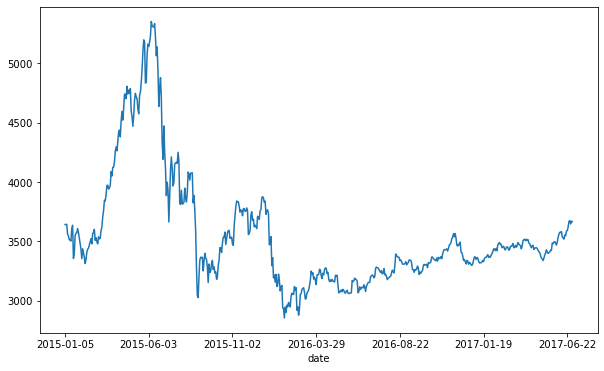

In [80]:
hs300['close'].plot(figsize=(10, 6))

<AxesSubplot:xlabel='date'>

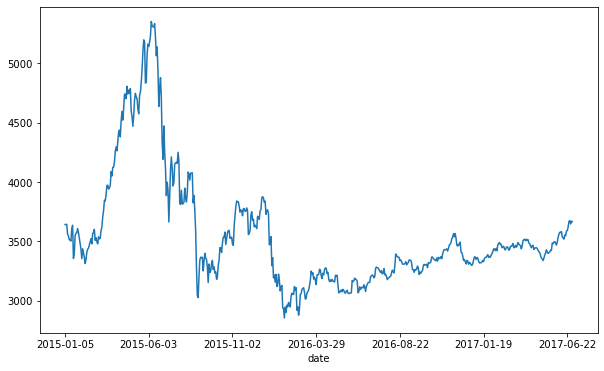

In [81]:
hs300.close.plot(figsize=(10, 6))     #等价；

In [82]:
data = ts.get_k_data('600030') #默认前复权价格；
data.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2019-03-11,24.00,24.09,24.48,23.20,3791527.0,600030
1,2019-03-12,24.17,24.68,25.34,24.17,4310350.0,600030
2,2019-03-13,24.73,23.92,24.77,23.86,2999074.0,600030
3,2019-03-14,23.75,23.37,24.25,23.11,2833472.0,600030
4,2019-03-15,23.61,23.81,24.10,23.43,2464579.0,600030


In [83]:
data2 = ts.get_k_data('600030', autype='hfq') #不复权
data2.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2019-03-12,96.570,98.608,101.245,96.570,4310350.0,600030
1,2019-03-13,98.808,95.571,98.967,95.332,2999074.0,600030
2,2019-03-14,94.892,93.374,96.890,92.335,2833472.0,600030
3,2019-03-15,94.333,95.132,96.290,93.613,2464579.0,600030
4,2019-03-18,94.892,98.408,98.648,93.094,2994299.0,600030


In [84]:
data3 = ts.get_k_data('600030', ktype = '5') #两个日期之间的前复权数据
data3.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,amount,turnoverratio,code
0,2021-10-12 13:45,24.80,24.90,24.90,24.77,27695.01,{},2.8218,600030
1,2021-10-12 13:50,24.90,24.87,24.92,24.84,19207.00,{},1.9570,600030
2,2021-10-12 13:55,24.87,24.90,24.96,24.87,13402.00,{},1.3655,600030
3,2021-10-12 14:00,24.90,24.87,24.93,24.86,12080.00,{},1.2308,600030
4,2021-10-12 14:05,24.86,24.84,24.88,24.80,14954.00,{},1.5236,600030


In [85]:
data = ts.get_k_data(['600030','000001'])    #tushare API接口不支持多股票数据；
data

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.37120607250036589" (found at least ' ')
URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.37120607250036589" (found at least ' ')
URL can't contain control characters. "/appstock/app/fqkline/get?_var=kline_dayqfq&param=['600030', '000001'],day,,,640,qfq&r=0.37120607250036589" (found at least ' ')


""


#### Tushare获得历史逐笔交易数据

In [93]:
#tushare 现在已经没有tick数据了
df = ts.get_tick_data('600030',date='2017-07-28')    #get_tick_data()  
df.sort_index(inplace = True, ascending = False)
f.head()
print(df)

None


#### Tushare获得当前主流指数列表

In [101]:
df = ts.get_index()
df.head()   #显示部分主流指数

Exception: 接口不存在get_index

#### Tushare获得股票的基本面信息

In [105]:
df = pro.stock_company(exchange='SZSE', fields='ts_code,chairman,manager,secretary,reg_capital,setup_date,province')         #基本面数据
#date = df.ix['600848']['timeToMarket']
df

,ts_code,chairman,manager,secretary,reg_capital,setup_date,province
0,002676.SZ,莫绮颜,莫绮颜,李笛鸣,72000.0000,19920508,广东
1,002875.SZ,曹璋,曹璋,王峰,17031.5462,20010920,广东
2,300664.SZ,王鹏鹞,王鹏鹞,夏淑芬,71424.4800,19970715,江苏
3,002564.SZ,俞铮庆,俞铮庆,王煜,86937.5282,20010331,江苏
4,300943.SZ,杨广宇,梁柏松,陈峰,13588.0000,19930508,浙江
...,...,...,...,...,...,...,...
2583,002517.SZ,陈永聪,陈永聪,骞军法,215251.7634,20000103,福建
2584,300936.SZ,俞卫忠,俞卫忠,俞丞,7520.0000,20060328,江苏
2585,300420.SZ,侯友夫,张立永,王镜疑,111638.3561,20010622,江苏
2586,300174.SZ,许文显,官伟源,罗聪,31223.1168,19990521,福建


In [ ]:
date = df.loc['600030']['timeToMarket']        #ix即将要被取消；
date

#### 获得所有股票基本面数据

In [106]:
data = ts.get_stock_basics()     #get_stocl_basics()
data.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
data.info()

In [ ]:
data.ix['600030'][['pe','esp']]     #pandas数据选择的复习；

In [ ]:
data.loc['600030'][['pe','esp']]

In [ ]:
data = ts.get_profit_data(2017,1)    #获得公司盈利数据；

In [ ]:
data.head()

In [ ]:
data.set_index('code', inplace = True)

In [ ]:
data.head()

In [ ]:
data.ix['600030'][['roe','net_profit_ratio']]

#### 获得非结构化新闻、舆情数据

In [ ]:
ts.get_latest_news(top=5,show_content=True) #显示最新5条新闻，并打印出新闻内容

#### 获取龙虎榜信息

In [ ]:
top_list = ts.top_list('2017-08-11')
top_list.head()

### 2.4 常用：优矿

可以通过优矿下载数据，并保存成CSV文件下载再导入；

In [ ]:
# 获得某一只当天的tick数据；
data=DataAPI.MktTickRTIntraDayGet(securityID=u"000001.XSHE",startTime=u"09:30",endTime=u"15:00",field=u"",pandas="1")
data.to_csv('tick_data.csv')   #下载并保存数据以供分析；

In [ ]:
# 获得某一些股票具体某一天的因子数据；
DataAPI.MktStockFactorsOneDayGet(tradeDate=u"20170630",secID=u"",ticker=u"000001,600030",field=u"ticker,ROE,PE,PB",pandas="1")

In [ ]:
#某一只股票一段时间之内的因子数据；
DataAPI.MktStockFactorsDateRangeGet(secID=u"",ticker=u"000001",beginDate=u"20100101",endDate=u"20170616",field=u"tradeDate,ROE,PE,PB",pandas="1")

In [ ]:
# 获取交易日历
start_date = '2014-01-01'
end_date = '2017-07-01'
trading_date = DataAPI.TradeCalGet(exchangeCD=u"XSHG",beginDate=u"",endDate=u"",field=u"",pandas="1")
# trading_date.to_csv('trading_date.csv')
# 筛选2013年到2016年每月最后一个交易日的日期
print(trading_date)
month_end = trading_date[(trading_date['isMonthEnd']==1) & (trading_date['calendarDate']>start_date) & (trading_date['calendarDate']<end_date)]['calendarDate'].tolist()
print month_end

In [ ]:
# 获取某个日期以前上市的，正常交易或暂停交易的股票代码，格式为xxxxxx.XSHE或xxxxxx.XSHG
date = '2017-10-01'
stock_basics = DataAPI.EquGet(equTypeCD=u"A",secID=u"",ticker=u"",listStatusCD=u"",field=u"",pandas="1")
# stock_basics.to_csv('data/stock_basics.csv', encoding='GB18030')
valid_stocks = stock_basics.loc[(stock_basics['listDate']<date) & (stock_basics['listStatusCD'].isin(['L','S']))]['secID']
# valid_stocks.to_csv('data/valid_stocks.csv', encoding='GB18030')
print valid_stocks

In [ ]:
# 获取对应股票在对应日期的多个因子值
import pandas as pd

mkt_value = [DataAPI.MktStockFactorsOneDayGet(tradeDate=date,secID=valid_stocks,ticker=u"",field=["secID", 'LCAP','PE', 'REVS20', 'tradeDate'],pandas="1").set_index(['tradeDate', 'secID']) for date in month_end]
lcap = pd.concat(mkt_value, axis=0)
# lcap.to_csv('data/raw_factors.csv')
print lcap.head(5)

In [ ]:
# 每个月最后一个交易日计算市值最小的20只股票
import pandas as pd

min_cap_pool = {date: lcap['LCAP'][date].sort_values(ascending=True).index[:20] for date in month_end}
min_cap_pool = pd.DataFrame(min_cap_pool)
print min_cap_pool

## 3. 数据存储

HDF5

Hierarchical Data Format(HDF)是一种针对大量数据进行组织和存储的文件格式。

经历了20多年的发展，HDF格式的最新版本是HDF5

In [19]:
import numpy as np
import pandas as pd
import tushare as ts

In [6]:
%time data = np.random.randn(500000,10)

Wall time: 471 ms


In [7]:
data.shape

(500000, 10)

In [8]:
data = pd.DataFrame(data)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [10]:
hdf5 = pd.HDFStore('data/random_number.h5', 'w')        #pd.HDFStore(),'w':write模式；知识生成了HDF5对象/文件；

In [ ]:
hdf5.      #tab

In [11]:
hdf5.open()       #打开刚刚创建的HDF5的文件；

In [12]:
hdf5['data'] = data      #设置主键的名字，名字叫做data；把data随机数数据已经存进HDF5文件；

In [13]:
hdf5.close()

In [14]:
hdf5 = pd.HDFStore('data/random_number.h5', 'r')      #'r'读取模式；

In [15]:
data_read = hdf5['data']     #读取hdf5中的数据并赋值给data_read

In [16]:
data_read.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.205942,-0.280256,-1.671727,0.364285,-0.488249,-0.060461,1.861852,0.744359,0.818997,0.458245
1,-0.801891,0.102070,1.293319,1.254277,1.067564,0.261026,-1.077104,-0.274136,0.190381,-0.441855
2,0.236176,0.521590,1.321235,0.920120,-0.474281,0.037810,-0.636843,0.017675,0.768869,2.340724
3,-1.037212,-1.046202,1.970948,0.894232,-0.475212,2.401837,-0.893403,0.426868,-0.896778,-0.355959
4,1.148933,1.075020,-1.818066,1.162867,1.581717,0.681554,-0.607851,2.105613,1.508517,0.488335


In [17]:
hdf5.close()

In [20]:
profit_data = ts.get_profit_data(2017,1)

[Getting data:]#######################################################

In [21]:
profit_data.head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [22]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 9 columns):
code                 3289 non-null object
name                 3289 non-null object
roe                  3281 non-null float64
net_profit_ratio     3284 non-null float64
gross_profit_rate    3284 non-null float64
net_profits          3288 non-null float64
eps                  3288 non-null float64
business_income      3288 non-null float64
bips                 3288 non-null float64
dtypes: float64(7), object(2)
memory usage: 231.3+ KB


In [23]:
hdf5 = pd.HDFStore('profit_data.h5', 'w')

In [24]:
hdf5['data'] = profit_data     #把刚刚从tushare上调取的利润数据存进HDF5文件里；

In [25]:
hdf5.close()

In [27]:
hdf5 = pd.HDFStore('profit_data.h5', 'r')

In [28]:
data_profit = hdf5['data']

In [29]:
data_profit.head(5)

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [30]:
data_profit[data_profit['roe']>15].head()

,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
0,600423,*ST柳化,215.12,10.30,-1.3970,40.6863,0.1018,394.6887,0.9883
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
2,000717,韶钢松山,26.83,3.19,6.2247,168.1588,0.0695,5268.7636,2.1776
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715


In [31]:
data_profit[(data_profit['roe']>15) & (data_profit['net_profit_ratio']>20)]      #数据库调取数据并进行多条件选股；


,code,name,roe,net_profit_ratio,gross_profit_rate,net_profits,eps,business_income,bips
1,600306,商业城,71.97,71.48,17.3030,171.9346,0.9651,240.5080,1.3501
3,600133,东湖高新,26.81,55.22,11.6396,686.8356,1.0828,1243.7266,1.9609
4,600354,敦煌种业,23.40,302.21,25.0654,273.7035,0.5185,90.5655,0.1715
5,600225,*ST松江,22.84,146.43,24.9719,423.3024,0.4524,289.0652,0.3089
6,600230,沧州大化,21.94,39.66,55.6318,424.8125,1.4440,1070.9230,3.6402
7,600338,西藏珠峰,20.28,53.09,70.4140,305.8753,0.4684,576.0689,0.8821
8,000036,华联控股,18.32,42.51,71.4131,758.4114,0.6643,1783.7509,1.5625
9,300288,朗玛信息,18.30,85.96,26.9264,240.8041,0.7125,280.1342,0.8289
10,600291,西水股份,17.53,22.32,26.3018,2117.8868,1.9375,9488.7197,8.6808
13,600633,浙数文化,16.31,192.98,43.5107,1259.7513,0.9676,652.7781,0.5013


声明：本资料仅限内部研究使用，切勿外传。